In [60]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [61]:
df = pd.read_csv("data.csv")

In [62]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing 

In [63]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Nhận xét:** 
* Có thể thấy column Unnamed: 32 chỉ chứa giá trị NaN vì thế, rất có thể chúng ta sẽ drop column này. 

Ta xem xét thông tin về dữ liệu như sau: 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Nhận xét:** 
* Nhìn vào dữ liệu, ta drop hẳn column id và Unamed: 32, vì 2 attribute này không ảnh hưởng đến kết quả train. 
* Chỉ có column diagnosis (kết quả test ung thư vú) có kiểu dữ liệu object. 
* Tổng cộng có 31 column có kiểu dữ liệu là float64 

In [65]:
#drop column id and unamed: 32 
df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)

#after drop 
df.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Nhận xét:** 
Sau khi drop 2 column, chúng ta sẽ check xem độ tương quan (correlation) của các column còn lại so với column diagnosis (attribute mà chúng ta sẽ phân tích trong bài này) 
Để dễ trực quan và xử lý dữ liệu, chúng ta sẽ đổi kiểu dữ liệu của column diagnosis từ object sang int64 (kiểu 1; 0). 

In [66]:
df.diagnosis.replace({"M":1,"B":0}, inplace=True) 

**Nhận xét:**
Như vậy, column `diagnosis` có dạng như sau: 
* Malignant (M) - 1
* Benignant (B) - 0

## Data Visualization 

Chúng ta trực quan hoá dữ liệu để tìm insight qua các biểu đồ sau: 

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

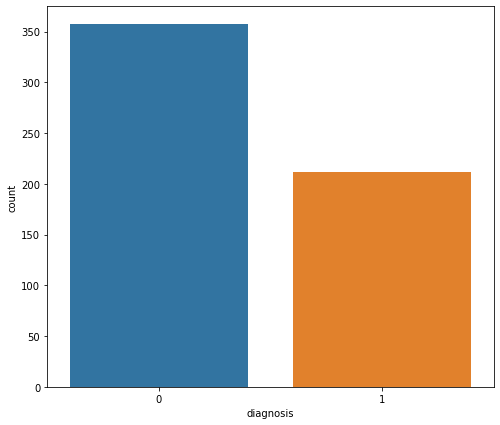

In [67]:
# barchart
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df)

<AxesSubplot:>

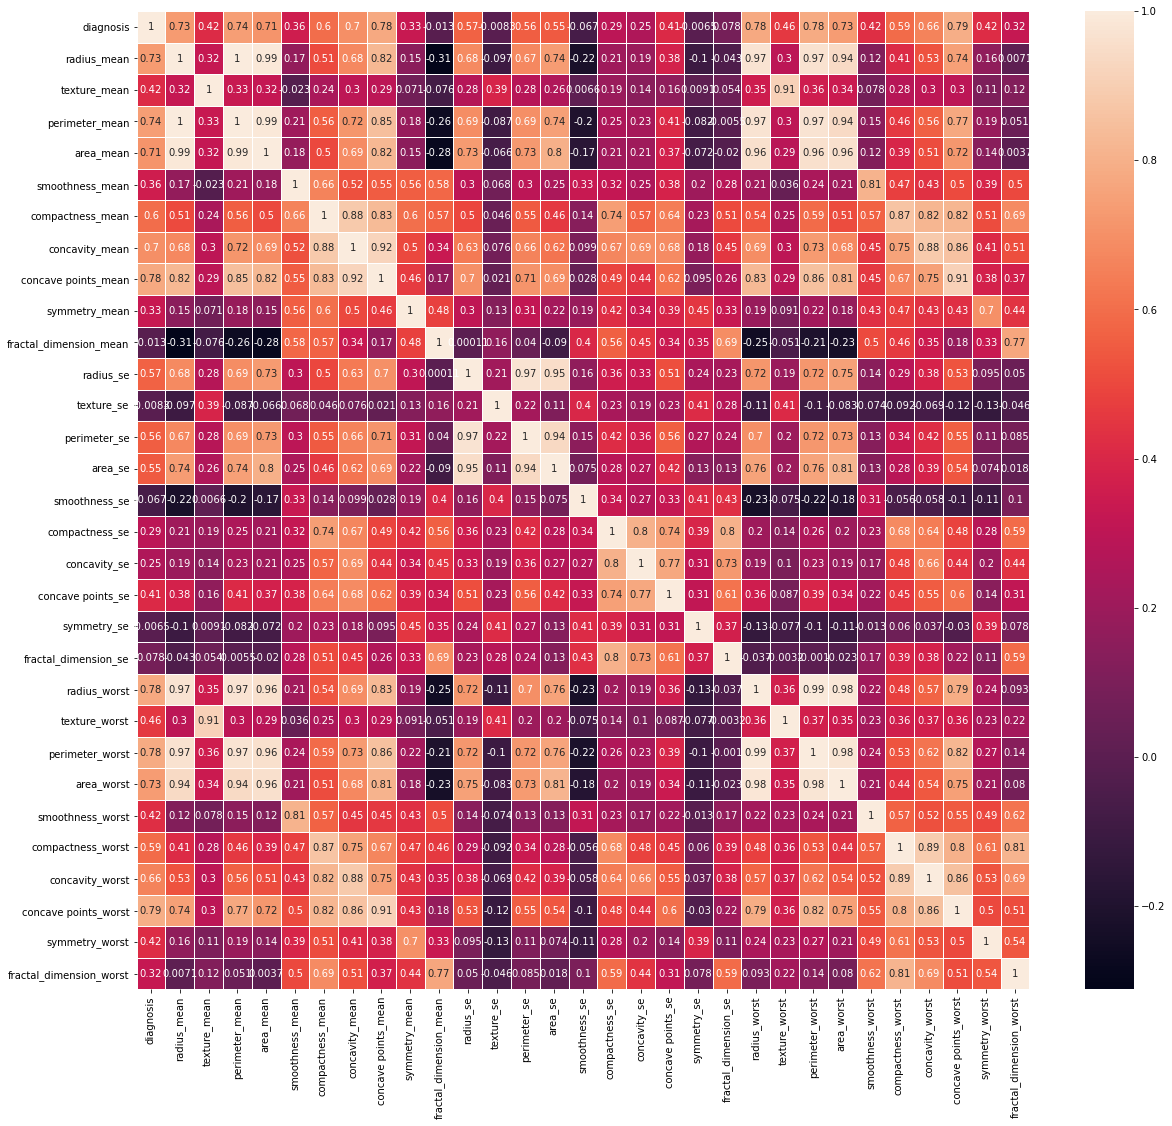

In [68]:
# correlation map 
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5)

**Nhận xét:** 
Nhìn vào correlation map, ta có thể nhận ra được rất nhiều thuộc tính có mối tương quan cao với thuộc tính `diagnosis`. Chúng ta sẽ loại bỏ các thuộc tính này để khi train không xảy ra hiện tượng đa cộng tuyến 

In [69]:
# dropping highly correlated features
corr_matrix = df.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(drop, axis = 1)

In [70]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dựa tên của các thuộc tính, có thể chia tập dữ liệu thành 3 phần: 
* `mean` group
* `se` group
* `worst` group

Trực quan hoá 3 phần này như sau: 

In [71]:
# Mean group with diagnosis
m_gr = ['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Se group with diagnosis
s_gr = ['diagnosis', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Worst group with diagnosis
w_gr = ['diagnosis', 'texture_worst','area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

## Trực quan `Mean` Group 

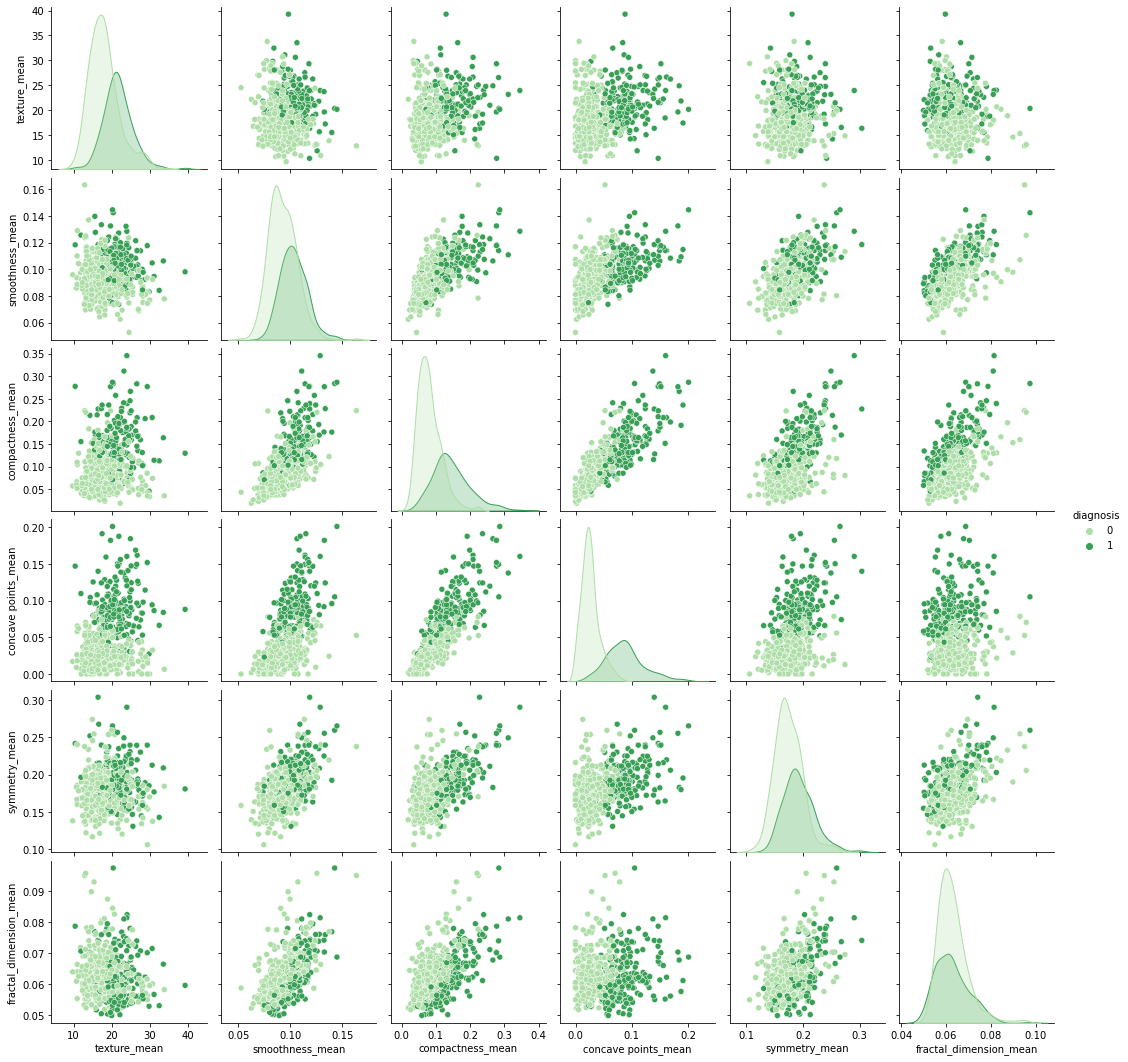

In [72]:
sns.pairplot(df[m_gr],hue = 'diagnosis', palette='Greens')

## Trực quan `Se` Group 

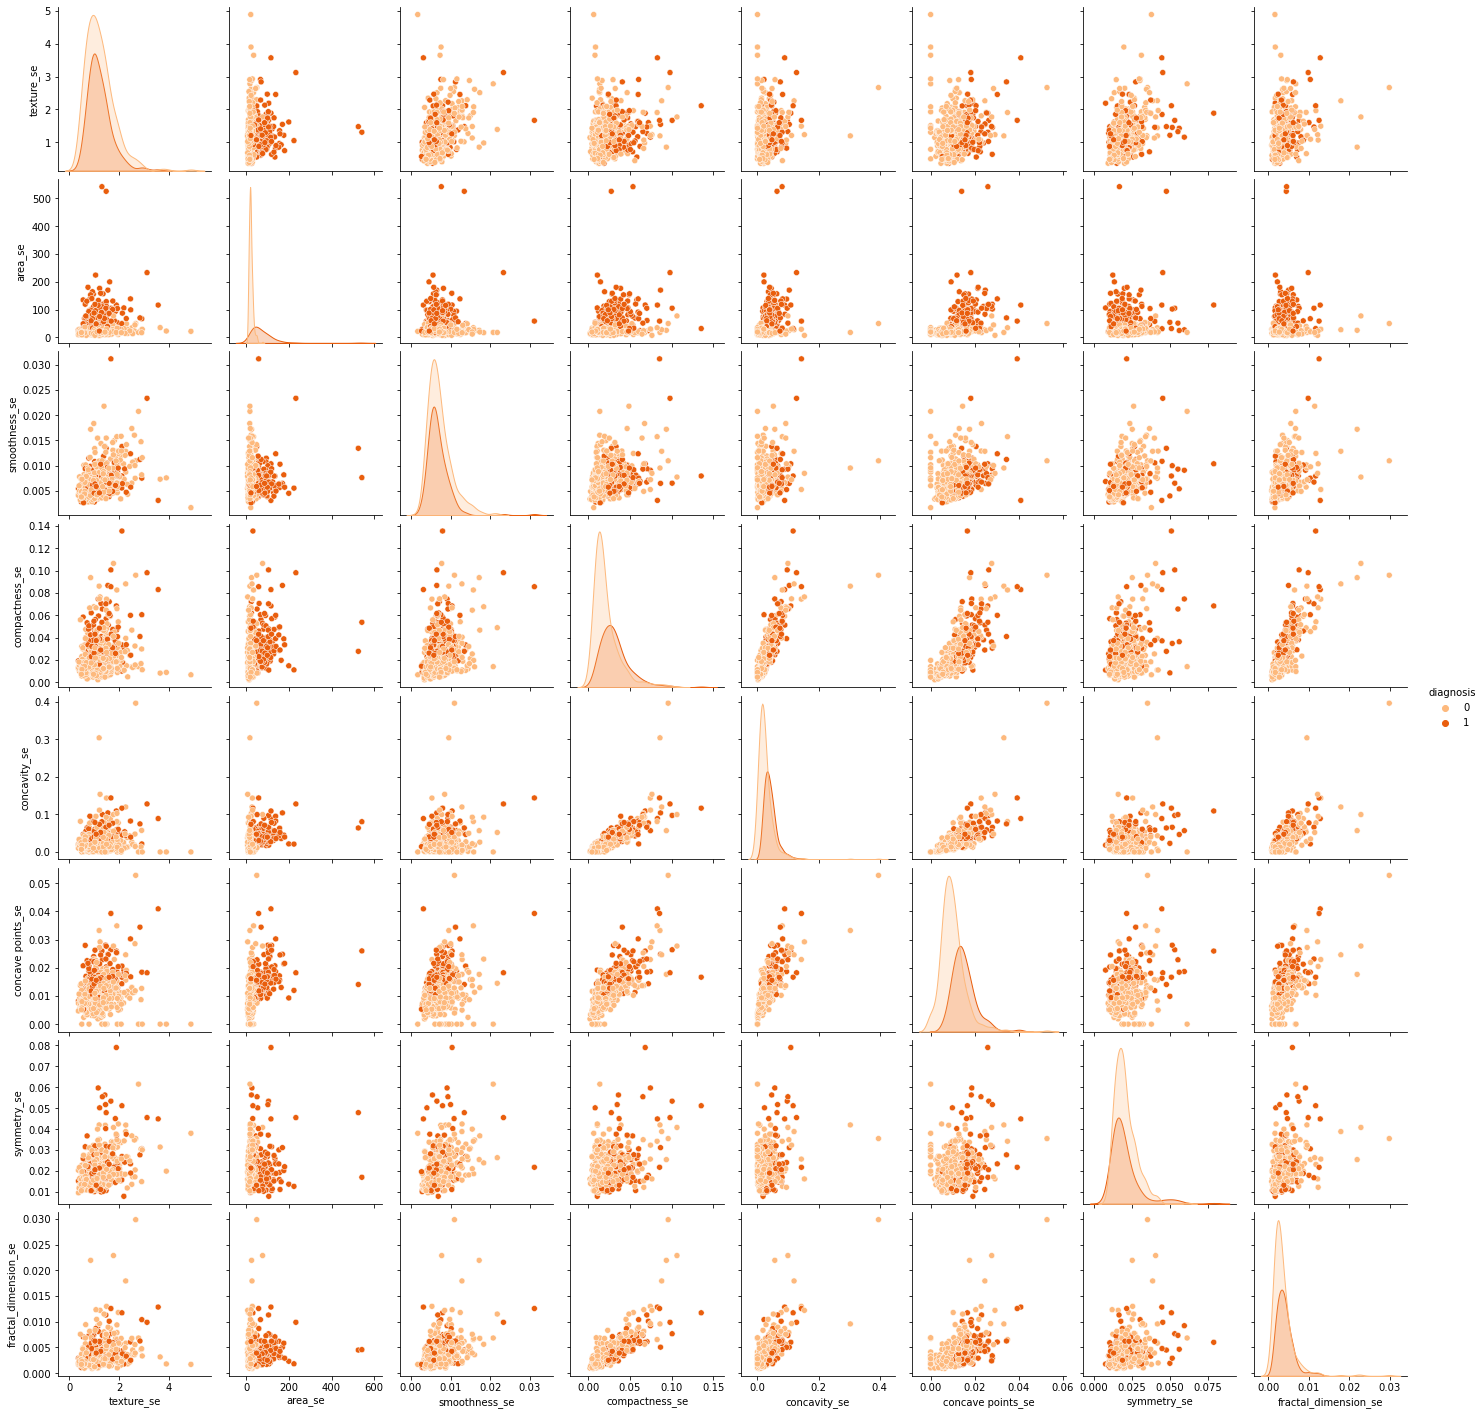

In [73]:
sns.pairplot(df[s_gr],hue = 'diagnosis', palette='Oranges')

## Trực quan `Worst` Group 

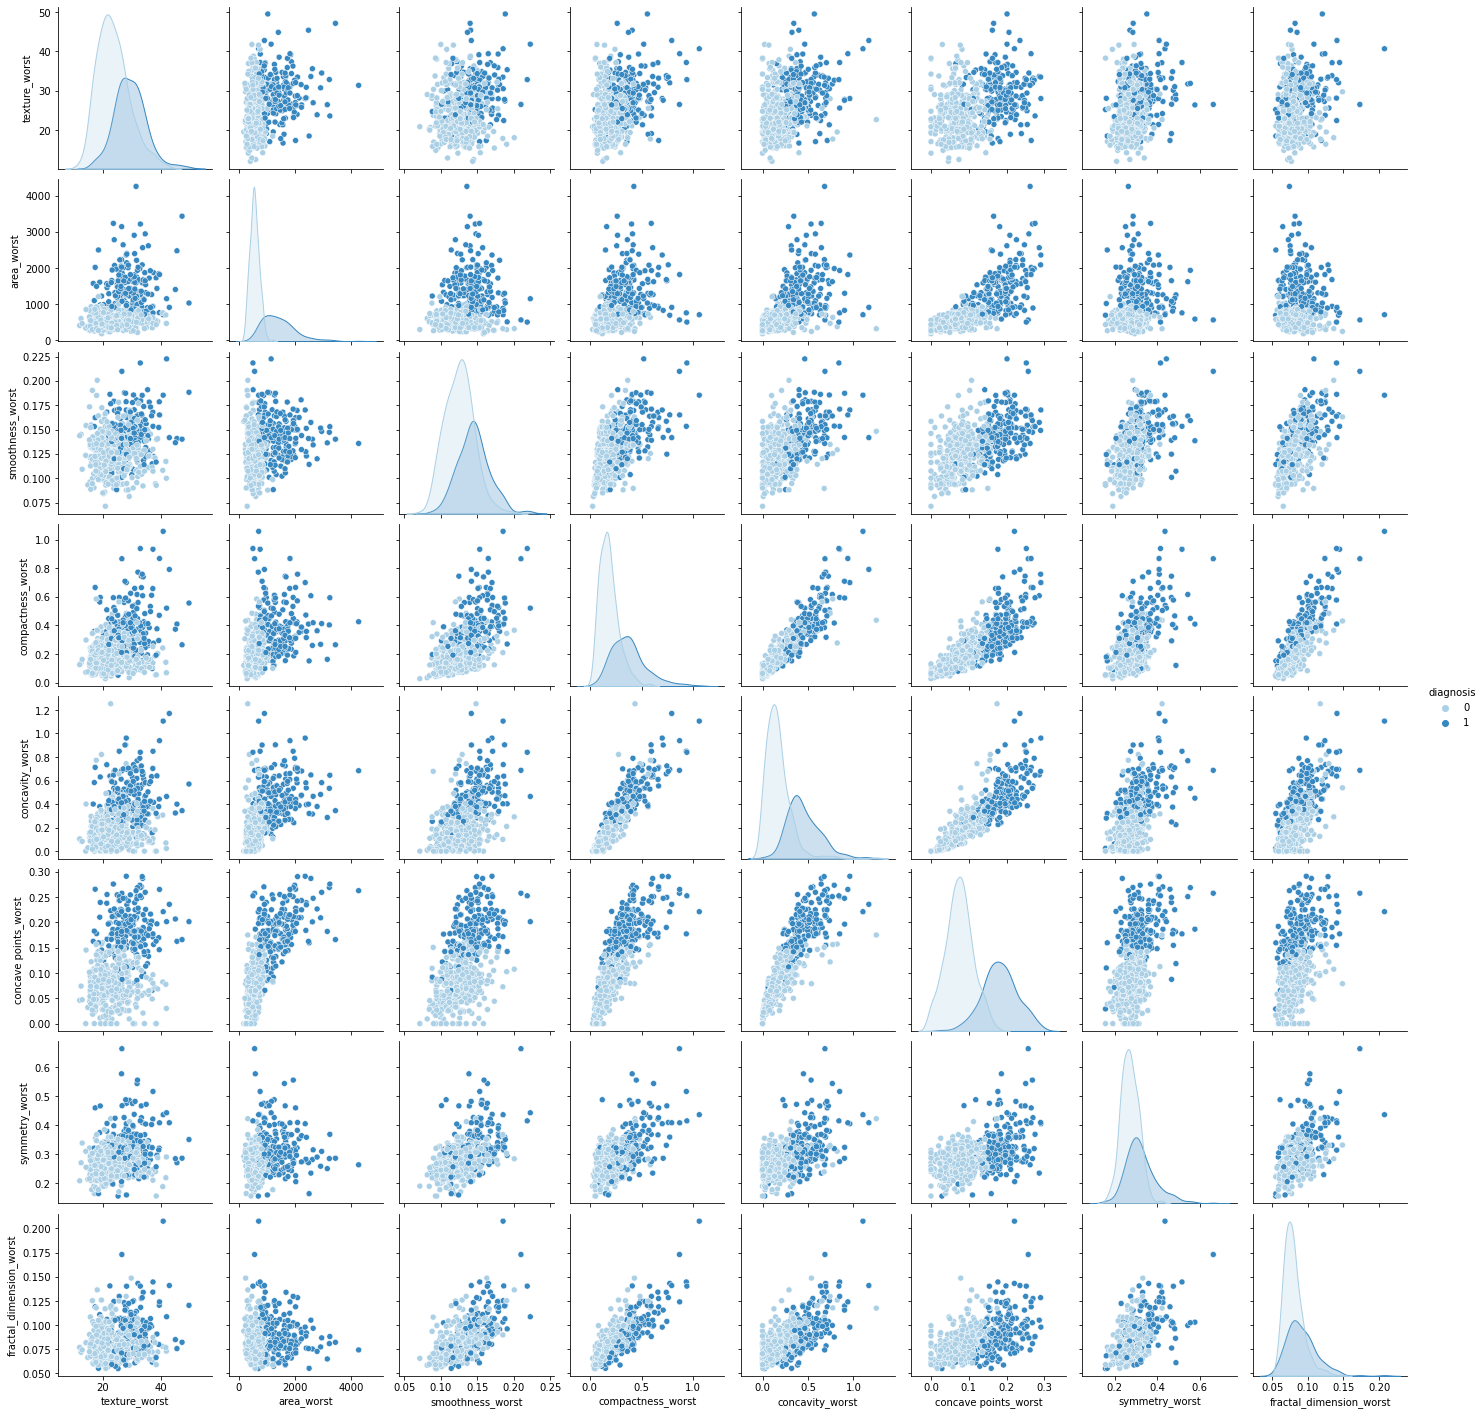

In [74]:
sns.pairplot(df[w_gr],hue = 'diagnosis', palette='Blues')

## Building Model 

### Data preparing

In [76]:
## Chia tập dữ liệu thành phần training và phần test
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape)
print("Test set", X_test.shape)

Training set:  (455, 22)
Testing set (114, 22)


In [77]:
# Scale Data 
from sklearn.preprocessing import StandardScaler 
stsc = StandardScaler()

X_train=stsc.fit_transform(X_train)
X_test=stsc.transform(X_test)

Suggesting: 
* Logistic Regression
* K Neighbors Classifier (KNN)
* Support Vector Classifier (SVC)
* SGD Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Voting Classifier
* Ada Boost Classifier
* Gradient Boosting Classifier
* Stochastic Gradient Boosting (SGB)
* Extreme Gradient Boosting